In [48]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [84]:
galia = ImageOps.invert(Image.open("Lab9_galia.png").convert('L'))
letter_e = Image.open("lab9_galia_e.png").convert('L')
letter_e = letter_e.rotate(180)
letter_e = np.asarray(letter_e)
# letter_e = letter_e.rotate(90)
array = np.asarray(galia)
letter_e.show()

In [55]:
sp = np.fft.fft2(array)
Image.fromarray(sp.real).show()
freq0 = np.fft.fftfreq(array.shape[0])
freq1 = np.fft.fftfreq(array.shape[-1])
print(sp.shape)
print(freq0.shape, freq1.shape)
# plt.plot(freq, sp.real, freq, sp.imag)

(463, 953)
(463,) (953,)


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


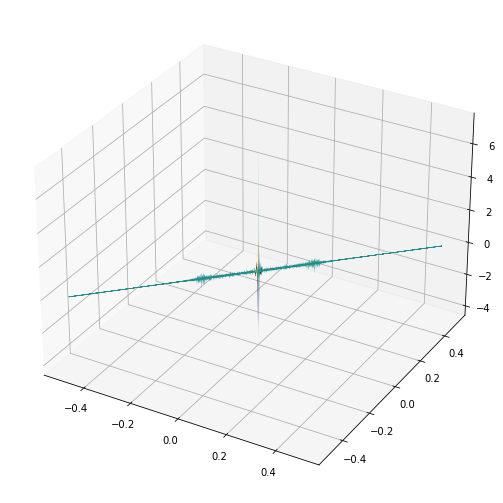

In [56]:
fig = plt.figure(figsize=(18, 9))
ax = plt.axes(projection='3d')
x, y = np.meshgrid(freq0, freq1)
ax.plot_surface(freq1, freq1, sp, cmap='viridis')
plt.show()

In [88]:
c = np.multiply(ifft2(fft2(array, (953, 953))), fft2(letter_e, (953, 953))).real

In [89]:
print(c)

[[ 1.47836603e-10  1.71798611e-11  4.46586330e-10 ...  2.14987705e-10
  -3.50646120e-11  9.42944552e-11]
 [-1.37061638e-10 -2.18460423e-10  2.42291091e-10 ...  2.30267286e-10
  -2.03233988e-10 -2.94228353e-10]
 [-4.28942195e-10 -4.56941607e-10  1.49819933e-10 ... -2.46531122e-10
  -5.65958094e-10 -8.32980637e-10]
 ...
 [-4.19366651e-10 -6.74634776e-10 -2.98450602e-10 ... -6.04667948e-10
  -5.44033893e-10 -1.01629816e-09]
 [ 1.37368412e-11 -4.62075471e-10 -1.17631606e-10 ... -3.15442172e-10
  -4.45322188e-10 -7.44444361e-10]
 [-1.03158118e-10 -1.68399954e-10  1.94892149e-10 ... -1.32134545e-10
  -9.43309873e-11 -2.36054074e-10]]


In [77]:
Image.fromarray(c).show()

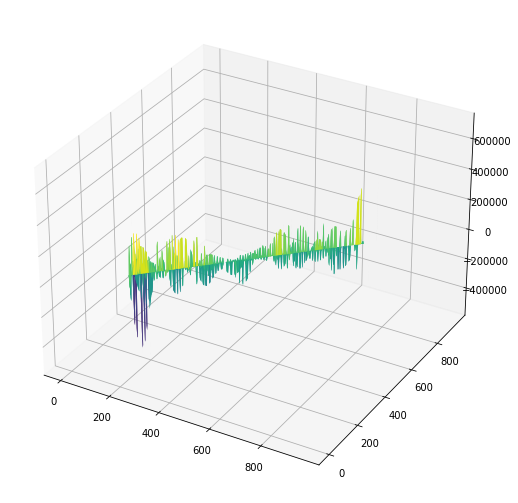

In [78]:
fig = plt.figure(figsize=(18, 9))
ax = plt.axes(projection='3d')
ax.plot_surface(range(953), range(953), c, cmap='viridis')
plt.show()

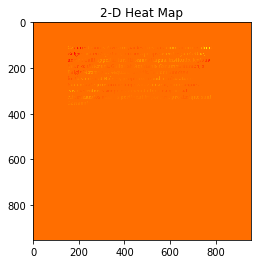

In [90]:
plt.imshow( c , cmap = 'autumn' , interpolation = 'nearest' )

plt.title( "2-D Heat Map" )
plt.show()